# PREDICTION OF FOREST FIRES USING MACHINE LEARNING AND DATA ANALYSIS
This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data 


> 


Dataset: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
> 13 Attributes + 1 target variable









In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Basic preprocessing of variables


In [ ]:
fig = px.histogram(df, 
                   x='area', 
                  
                   marginal='box', 
                   color_discrete_sequence=['green'],                    
                   title='Distribution of Area')
fig.update_layout(bargap=0.1)
fig.show()

As seen in above figure, the area parameter is pretty distorted towards 0.0
Thus, using logrithm transform ln(area+1) to remodel 'area' and generate the new varibale 'logArea'

In [ ]:

df['logArea']=np.log(df['area']+1) # logorithm transform

In [ ]:
fig = px.histogram(df, 
                   x='logArea', 
                   
                  
                   marginal='box', 
                   color_discrete_sequence=['green','orange'],                    
                   title='Distribution of Area')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,logArea
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


Plot scatterplots and distributions of numerical features to see how they may affect the target variable "area"

In [ ]:
def plot_scatter(df,a,b):
  fig = px.scatter(df, x=a, y=b)
  fig.show()

In [ ]:
def plot_box(df,a,b):
  fig = px.histogram(df, 
                   x=a, 
                   y=b,
                   
                  
                   marginal='box', 
                   color_discrete_sequence=['green','orange'],                    
                   )
  fig.update_layout(bargap=0.1)
  fig.show()

In [ ]:
for i in df.describe().columns[:-2]:
    plot_box(df,i,'logArea')


In [ ]:
for i in df.describe().columns[:-2]:
    plot_scatter(df,i,'logArea')


In [ ]:
for i in df.describe().columns[:-2]:
  fig = px.violin(df, 
                  x=i, y="logArea", 
                  #box=True, # draw box plot inside the violin
                  color_discrete_sequence =['purple']
                
               )
  fig.show()

In [ ]:
df['Fire'] = np.where(df['logArea']>0, 'Yes', 'No')

Plot boxplots of how the categorical features (month and day) affect the outcome


In [ ]:
fig = px.histogram(df, 
                   x='day', 
                   y='logArea',
                   marginal='box', 
                   color='Fire',
                   color_discrete_sequence=['orange','grey'],                    
                   title='Distribution of Area(daywise)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x='month', 
                   y='logArea',
                   marginal='box', 
                   color='Fire',
                   color_discrete_sequence=['blue','purple'],                    
                   title='Distribution of Area(month)')
fig.update_layout(bargap=0.1)
fig.show()

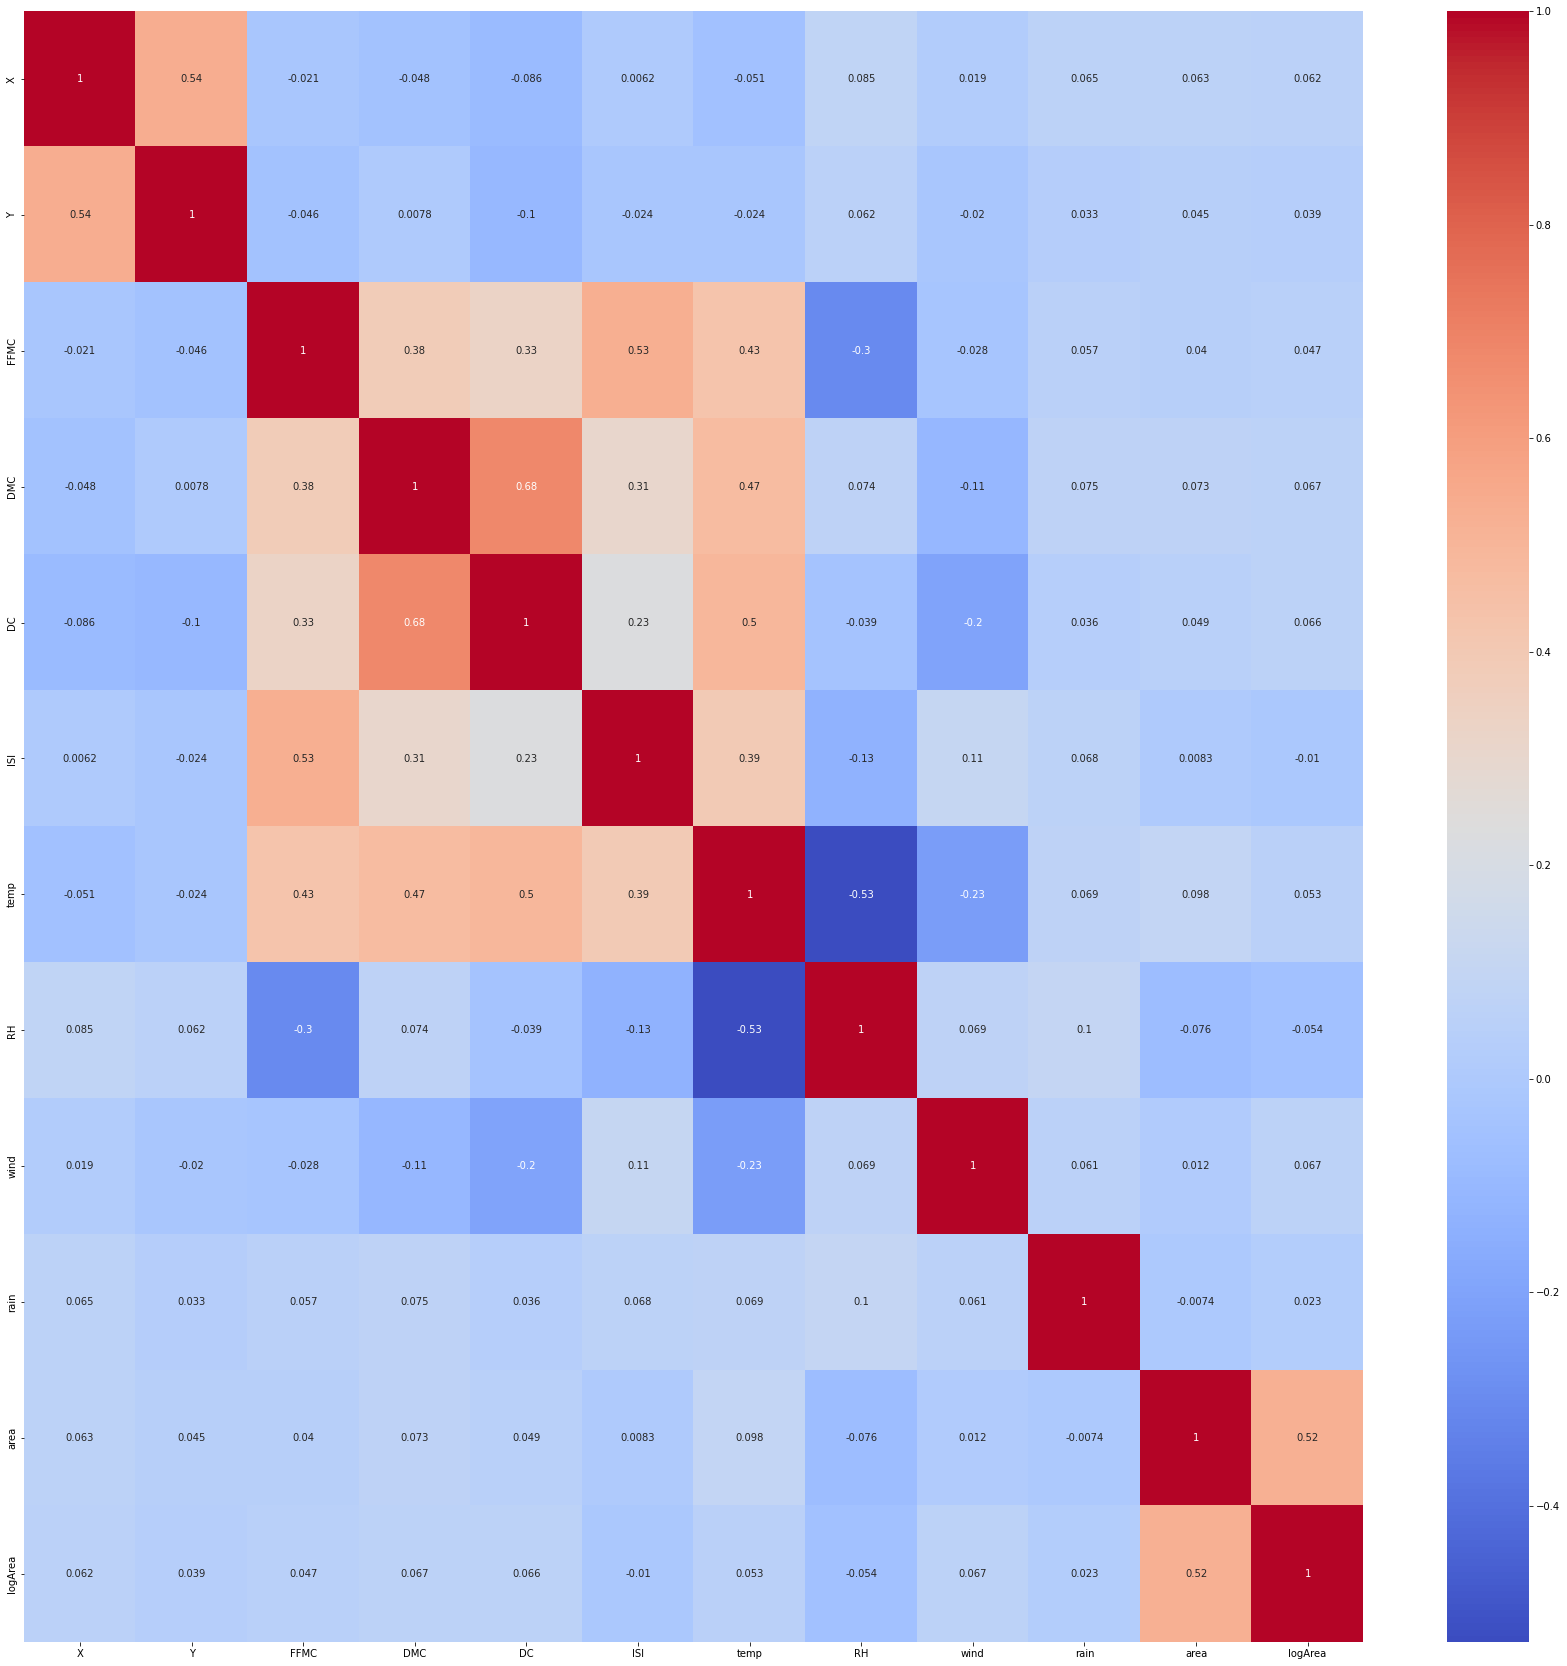

In [ ]:
#correlation using heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")
plt.show()


### Visualization in 1D
  For every figure, 3 plots generated:
  -     Univariate Histogram: x-axis: the variable itself ; y-axis: the freqeuncy/times of the data 
  -    Kernel Density Estimation: x-axis: the variable itself; y-axis:the probability density of the variable estimated
  -     Single Parameter Distribution: the combination of above two plots for better observation with classification and comparison


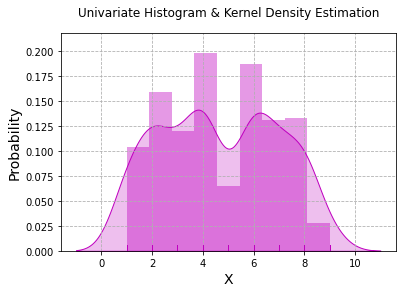

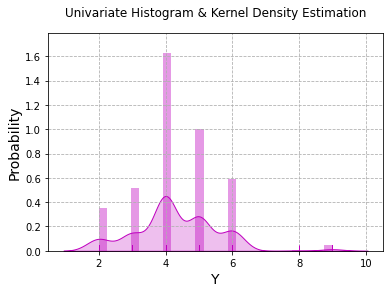

ValueError: ignored

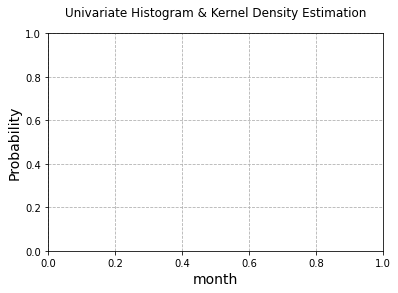

In [ ]:
def singleparameterdistribution(kde=True,hist=True,variable=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],figNo=13):
  	assert isinstance(variable,list)
  	assert isinstance(figNo,int)
  	assert figNo==len(variable) #number of figures plot= number of variables plot
  	for i in range(figNo):
  		assert isinstance(variable[i],str)
  		assert variable[i] in ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']# no input variable outside dataset
  		plt.figure(i)
  		if hist==True and kde==False: # Univariate Histograms
  			t='Univariate Histogram'
  			y='Frequency'
  			clr='r'
  		elif kde==True and hist==False:# Kernel Density Estimation
  			t='Kernel Density Estimation'
  			y='Probability'
  			clr='g'
  		else: # combination of two plots
  			t='Univariate Histogram & Kernel Density Estimation'
  			y='Probability'
  			clr='m'
  		plt.title(t,fontsize=12,position=(0.5,1.05))
  		plt.ylabel(y,fontsize=14)
  		plt.xlabel(variable[i],fontsize=14)
  		plt.grid(linestyle='--') # add grids
  		sns.distplot(df[variable[i]],kde=kde,hist=hist,kde_kws={'shade':kde},color=clr,rug=True)# add shades to kde plots and rug plots to all three kinds of plots
  		plt.show()

singleparameterdistribution(kde=True,hist=True,variable=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],figNo=13)


For better visualization, adding variable 'Fire',which indicates 'fire' or 'no fire'

In [ ]:
df.Fire.value_counts()#no of unique values

Yes    270
No     247
Name: Fire, dtype: int64

Based on the  forest Fire Weather Index system, DMC is influenced by temperature(temp), reletive humidity(RH) and rain.

To clarify the correlation between DMC and the rest variables initially, create the pairplots.


In [ ]:
df1=pd.DataFrame(df,columns=['DMC','temp','RH','rain','logArea','Fire'])


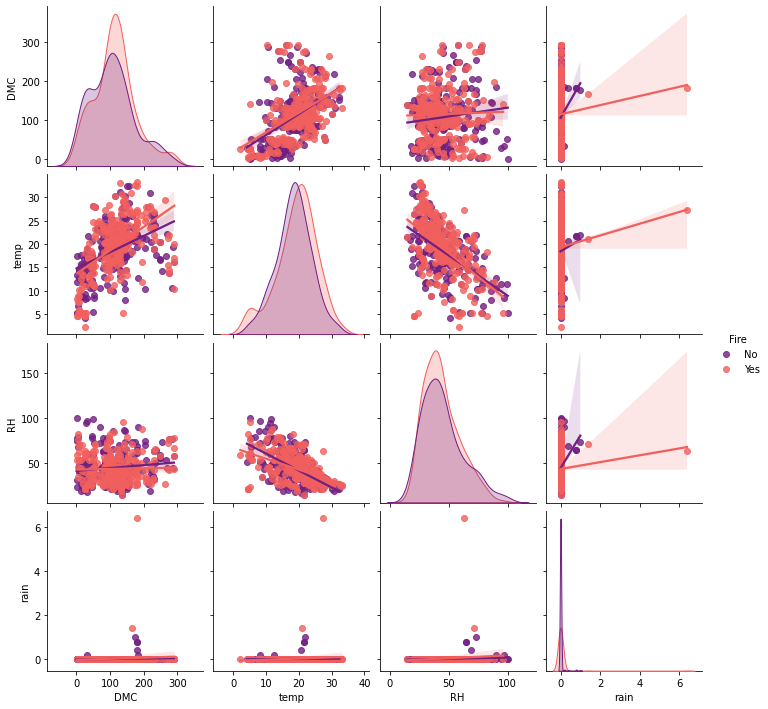

In [ ]:
sns.pairplot(df1,vars=['DMC','temp','RH','rain'],kind='reg',hue='Fire',palette='magma')
plt.show()

<Figure size 5760x5760 with 0 Axes>

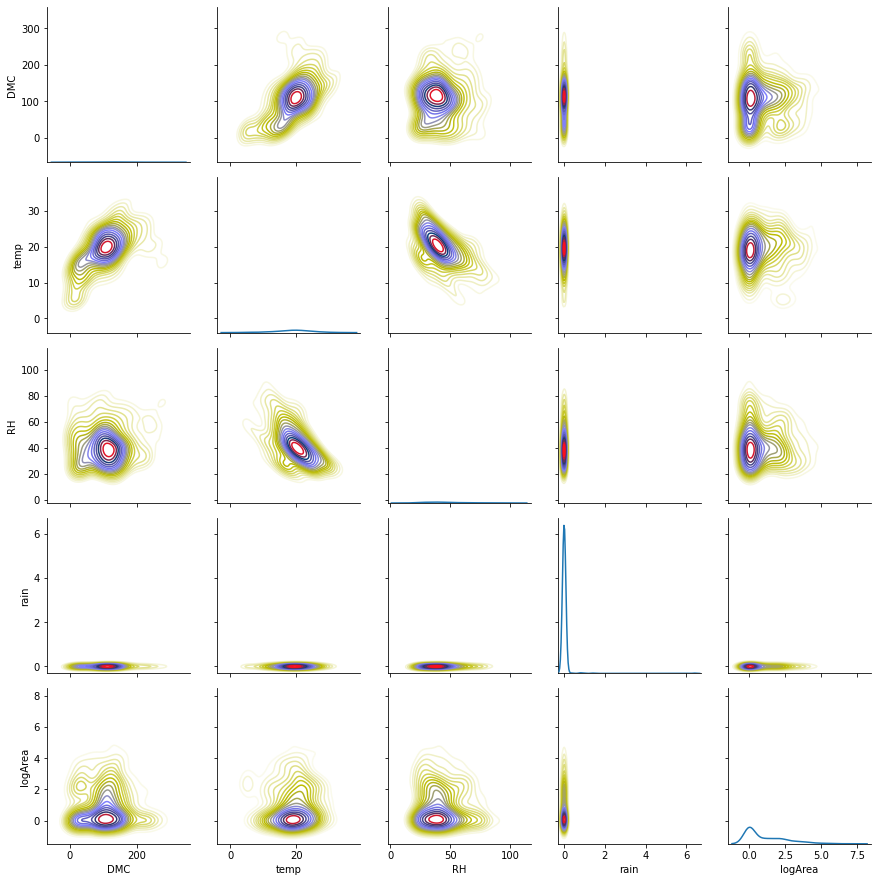

In [ ]:
plt.figure(figsize=(80,80))
#kdeplots of two variables(the core indicates the highest density)
g = sns.PairGrid(df1)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,cmap="gist_stern_r",n_levels=20)
plt.show()

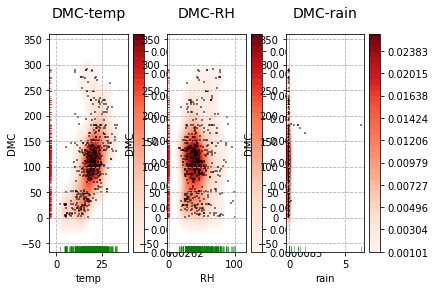

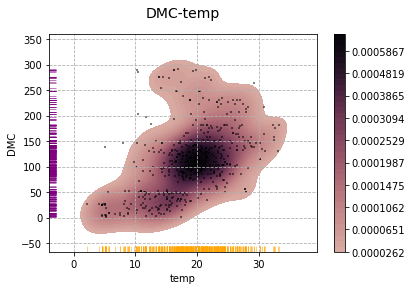

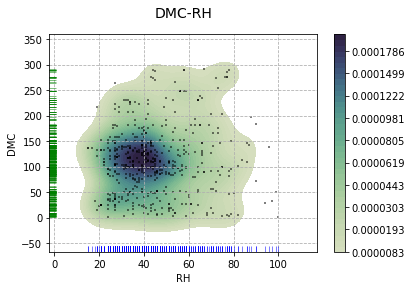

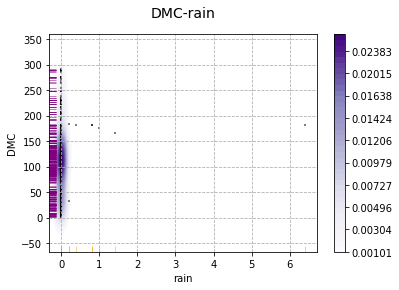

In [ ]:
plt.figure(17)
sub=131
for i in ['temp','RH','rain']:
	plt.subplot(sub)
	plt.title('DMC-'+i, fontsize=14, position=(0.5,1.05))
	sns.kdeplot(df1[i],df1['DMC'], # demonstrate the probability distribution of two variables
           cbar = True,    # display color bar
           shade = True,   # display shades
           cmap = 'Reds',  # set the color palatte
           shade_lowest=False,  # not display periphery color/shade
           n_levels = 40   # number of curves, the higher, the smoother
           )# the color change indicates the change of density
	plt.grid(linestyle = '--')
	plt.scatter(df1[i], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
	sns.rugplot(df1[i], color='g', axis='x',alpha = 0.5)
	sns.rugplot(df1['DMC'], color='r', axis='y',alpha = 0.5)
	sub += 1
plt.show()

plt.figure(18) # DMC-temp
plt.title('DMC-temp', fontsize=14, position=(0.5,1.05))
pal=sns.cubehelix_palette(8, gamma=2,as_cmap=True)
sns.kdeplot(df1['temp'],df1['DMC'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['temp'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['temp'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="purple", axis='y',alpha = 0.5)
plt.show()

plt.figure(19) # DMC-RH
plt.title('DMC-RH', fontsize=14, position=(0.5,1.05))
pal=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
sns.kdeplot(df1['RH'],df1['DMC'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['RH'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['RH'], color="blue", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="green", axis='y',alpha = 0.5)

plt.figure(20) # DMC-rain
plt.title('DMC-rain', fontsize=14, position=(0.5,1.05))
sns.kdeplot(df1['rain'],df1['DMC'],cbar = True,shade = True,cmap = 'Purples',shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['rain'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['rain'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="purple", axis='y',alpha = 0.5)
plt.show()


For rain, some adjustments are needed as major values lie near 0

In [ ]:
#Mapping days and months to numbers
df['monthsn']=df.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
df['daysn']=df.day.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7})

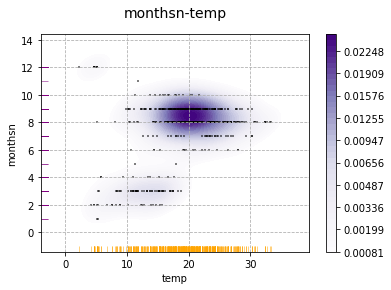

In [ ]:
 # DMC-temp
plt.title('monthsn-temp', fontsize=14, position=(0.5,1.05))
sns.kdeplot(df1['temp'],df['monthsn'],cbar = True,shade = True,cmap = 'Purples',shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['temp'], df['monthsn'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['temp'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df['monthsn'], color="purple", axis='y',alpha = 0.5)
plt.show()

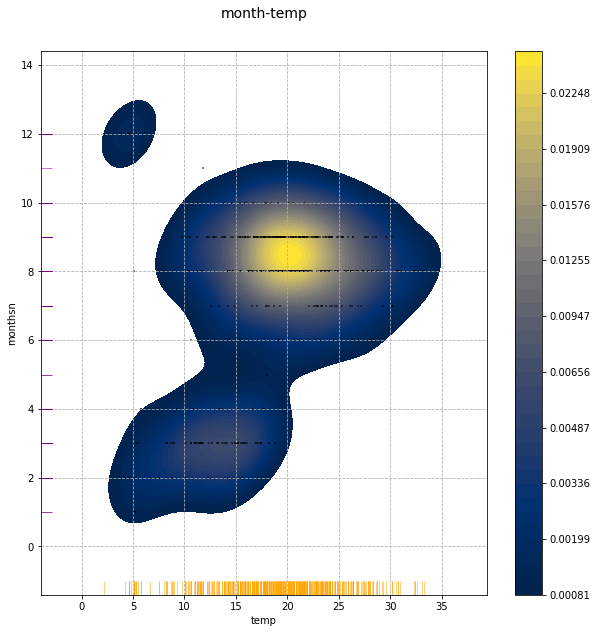

In [ ]:



plt.figure(figsize=(10,10)) # month-temp
plt.title('month-temp', fontsize=14, position=(0.5,1.05))
pal=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
sns.kdeplot(df1['temp'],df['monthsn'],cbar = True,shade = True,cmap = 'cividis',shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter( df['temp'],df['monthsn'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['temp'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df['monthsn'], color="purple", axis='y',alpha = 0.5)


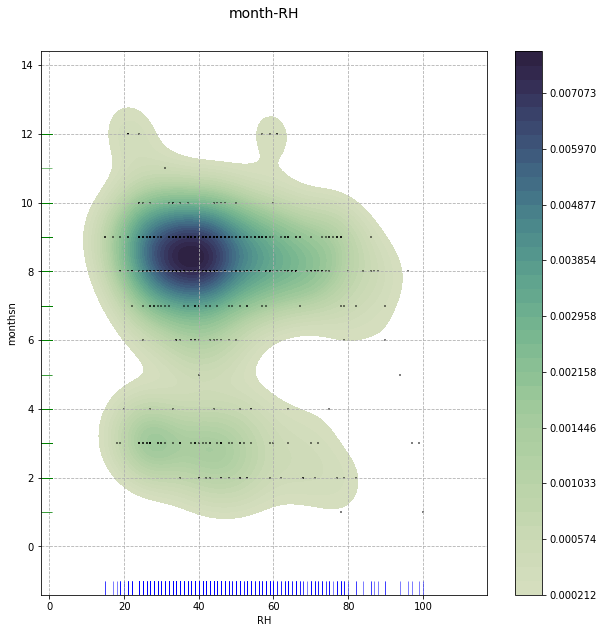

In [ ]:

plt.figure(figsize=(10,10)) # month-RH
plt.title('month-RH', fontsize=14, position=(0.5,1.05))
pal=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
sns.kdeplot(df1['RH'],df['monthsn'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter( df['RH'],df['monthsn'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['RH'], color="blue", axis='x',alpha = 0.5)
sns.rugplot(df['monthsn'], color="green", axis='y',alpha = 0.5)


### 3D Visualisations

In [ ]:

intensity=df.logArea

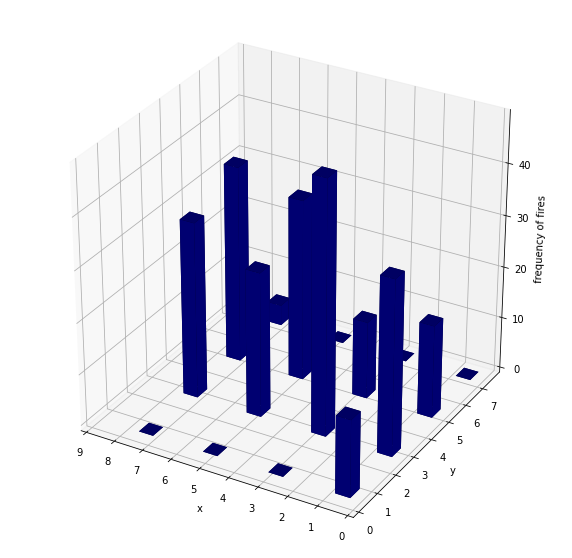

In [ ]:
def frequency_of_fires(intensity,X,Y):
    """
    For plotting the the frequency of fires in different grids of the park
    The areas with fire are filtered first and their frequency of recording a fire is plotted as a 3D plot. 
    Outliers are not included by default as only data with fires is considered.
    area column indicates the spread of the fire. Considered as intensity for all purposes.
    """
    from mpl_toolkits.mplot3d import Axes3D 
    import matplotlib.pyplot as plt
    import numpy as np
    assert isinstance(intensity, pd.core.series.Series)
    assert isinstance(X, pd.core.series.Series)
    assert isinstance(Y, pd.core.series.Series)
    assert intensity.all()>=0
    assert 0<X.all()<10
    assert 0<Y.all()<10
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    x=X.iloc[intensity.to_numpy().nonzero()[0]]
    y=Y.iloc[intensity.to_numpy().nonzero()[0]]
    #chose fewer bins to make it look less crowded.
    hist, xedges, yedges = np.histogram2d(x,y,bins=4,range=[[0, 9], [0,9]])
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    plt.style.use("seaborn-pastel")
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()
    #plt.ylim(9,0)
    plt.xlim(9,0)
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz,color='navy', zsort='average')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("frequency of fires")
    plt.show()
    
frequency_of_fires(intensity,df['X'],df['Y'])

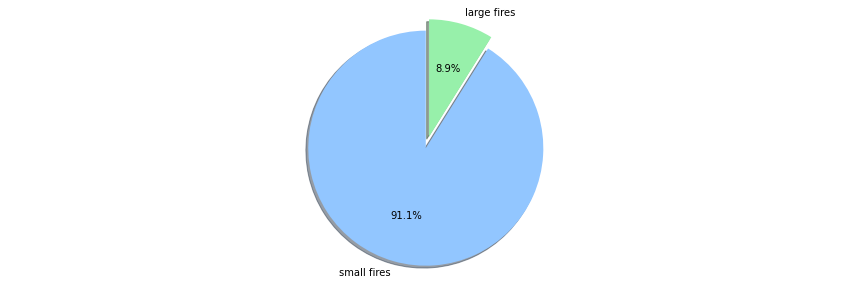

In [ ]:
def plot_areas_with_fires(intensity):
    '''
    Plots the large and small fires as a pie chart showing the 
    probability of occurrence of each
    '''
    import pandas as pd
    import matplotlib.pyplot as plt
    assert isinstance(intensity, pd.core.series.Series)
    assert intensity.all()>=0
    inten=intensity.iloc[intensity.to_numpy().nonzero()[0]]
    total=inten.count()
    small=inten[inten < 50 ].count() 
    large=inten[inten > 50 ].count() 
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'small fires','large fires'
    sizes = [small, large]
    explode = (0, 0.1)  # only "explode" the 2nd slice 

    fig1, ax1 = plt.subplots(figsize=(15,5))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  
    plt.show()
    
plot_areas_with_fires(df.area)

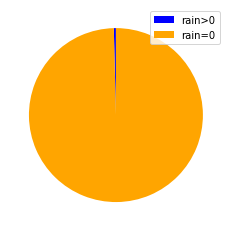

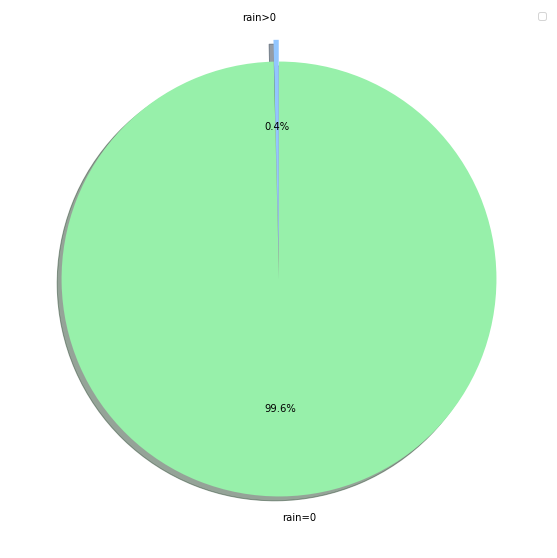

In [ ]:
intensity=df.area
rain=df.rain

def rain_plot(rain):
    '''
    Plots chart showing the variance of the feature-rain in the data
    '''
    import matplotlib.pyplot as plt
    assert isinstance(rain, pd.core.series.Series)
    assert rain.all()>=0
    r_1=rain[rain.le(1)].count() 
    r_2=rain[rain.le(4)].count()
    r_3=rain[rain.ge(4)].count()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels ='rain>0','rain=0'
    sizes = [r_2+r_3-r_1,r_1]
    explode = (0.1,0)
    colors = ['blue','orange']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    fig1, ax1 = plt.subplots(figsize=(10,10))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.legend(colors, labels, loc="best")
    plt.show()
    
rain_plot(rain)

In [ ]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)#drop first implies n-1 columns will be created
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


df = dummies('month',df)
df = dummies('day',df)

## TRAIN TEST SPLIT & Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 10)

In [ ]:
#fit learns what to do like here min and max; transform transforms the column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#takes min value and max value of the column and tries to limit the value to that range
num_vars = ["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
train[num_vars] = scaler.fit_transform(train[num_vars].copy())

In [ ]:
test[num_vars]=scaler.transform(test[num_vars].copy())

In [ ]:
train.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,logArea,Fire,monthsn,daysn,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
35,0.625,0.142857,0.923871,0.274294,0.847074,0.112299,0.526316,0.552941,0.455556,0.0,0.0,0.000000,No,9,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
481,0.375,0.142857,0.961290,0.390420,0.647473,0.169340,0.921053,0.082353,0.500000,0.0,0.0,0.000000,No,7,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
488,0.375,0.285714,0.985806,0.483115,0.701184,0.315508,0.565789,0.658824,0.800000,0.0,46.7,3.864931,Yes,8,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
347,0.500,0.285714,0.947097,0.337354,0.864782,0.171123,0.259868,0.705882,0.355556,0.0,0.0,0.000000,No,9,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
505,0.000,0.000000,0.932903,0.558580,0.863727,0.180036,0.805921,0.235294,0.155556,0.0,5.8,1.916923,Yes,8,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
test.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,logArea,Fire,monthsn,daysn,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
293,0.750,0.571429,0.960000,0.617850,0.495954,0.196078,0.812500,0.152941,0.555556,0.0,86.45,4.471067,Yes,7,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
336,0.750,0.285714,0.940645,0.369745,0.886713,0.110517,0.562500,0.341176,0.200000,0.0,0.00,0.000000,No,9,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
508,0.000,0.000000,0.932903,0.571330,0.873343,0.126560,0.779605,0.305882,0.355556,0.0,0.00,0.000000,No,8,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
351,0.375,0.285714,0.947097,0.337354,0.864782,0.171123,0.434211,0.447059,0.655556,0.0,7.31,2.117460,Yes,9,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
164,0.875,0.428571,0.916129,0.306340,0.816817,0.085561,0.513158,0.611765,0.200000,0.0,2.01,1.101940,Yes,9,7,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
X_train = train.drop(["area","logArea"],axis=1)

In [ ]:
X_test = test.drop(["area","logArea"],axis=1)

In [ ]:
X_train.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,monthsn,daysn,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.462855,0.334810,0.926965,0.388135,0.638184,0.160884,0.550668,0.349232,0.395090,0.008859,7.447028,4.214470,0.356589,0.012920,0.043928,0.005168,0.062016,0.036176,0.103359,0.002584,0.002584,0.023256,0.341085,0.129199,0.155039,0.173127,0.116279,0.136951,0.121447
std,0.288546,0.180364,0.074868,0.226764,0.292377,0.084724,0.187160,0.187424,0.188633,0.076439,2.277204,2.035437,0.479612,0.113075,0.205199,0.071795,0.241496,0.186969,0.304822,0.050833,0.050833,0.150910,0.474688,0.335854,0.362410,0.378846,0.320974,0.344241,0.327069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.285714,0.922581,0.249139,0.523748,0.112299,0.450658,0.211765,0.255556,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.375000,0.285714,0.940645,0.369745,0.770963,0.149733,0.562500,0.317647,0.400000,0.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.428571,0.957419,0.492074,0.828193,0.190731,0.677632,0.458824,0.500000,0.000000,9.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train=pd.DataFrame(train['logArea'])
y_train.head()

,logArea
35,0.000000
481,0.000000
488,3.864931
347,0.000000
505,1.916923


In [ ]:
y_test=pd.DataFrame(test['logArea'])
y_test.head()

,logArea
293,4.471067
336,0.000000
508,0.000000
351,2.117460
164,1.101940


## Feature Setups
1. FWI 
2. Spatial + temporal + meteorological
3. Meteorological
4. all

In [ ]:
X_train.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'Fire', 'monthsn', 'daysn', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed'],
      dtype='object')

In [ ]:
fs1 = pd.DataFrame()#spatial,temporal,meteorologiccal
fs1 = X_train.drop(['FFMC', 'DMC', 'DC', 'ISI', 
       'Fire', 'monthsn', 'daysn'],axis=1)
fs1.head()

,X,Y,temp,RH,wind,rain,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
35,0.562664,-1.065632,-0.130283,1.088297,0.320959,-0.116052,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
481,-0.304870,-1.065632,1.981532,-1.425781,0.556878,-0.116052,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
488,-0.304870,-0.272556,0.080898,1.653965,2.149330,-0.116052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
347,0.128897,-0.272556,-1.555758,1.905373,-0.209858,-0.116052,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
505,-1.606171,-1.858708,1.365586,-0.608706,-1.271493,-0.116052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
t_fs1 = X_test.drop(['FFMC', 'DMC', 'DC', 'ISI', 
       'Fire', 'monthsn', 'daysn'],axis=1)

In [ ]:
fs2 = pd.DataFrame()#FWI
fs2= X_train.drop(['X', 'Y', 'temp', 'RH', 'wind', 'rain',
       'Fire', 'monthsn', 'daysn', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed'],axis=1)
fs2.head()

,FFMC,DMC,DC,ISI
35,-0.041381,-0.502674,0.715377,-0.574185
481,0.459069,0.010093,0.031809,0.099943
488,0.786950,0.419393,0.215754,1.827398
347,0.269243,-0.224228,0.776023,0.121010
505,0.079417,0.752615,0.772408,0.226343


In [ ]:
t_fs2 = X_test.drop(['X', 'Y', 'temp', 'RH', 'wind', 'rain',
       'Fire', 'monthsn', 'daysn', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed'],axis=1)
t_fs2.head()

,FFMC,DMC,DC,ISI
293,0.441812,1.014323,-0.487092,0.415941
336,0.182959,-0.081201,0.851127,-0.595252
508,0.079417,0.808913,0.805342,-0.405653
351,0.269243,-0.224228,0.776023,0.121010
164,-0.144922,-0.361168,0.611758,-0.890183


In [ ]:
fs3=pd.DataFrame()#meteorological
fs3 = X_train.drop(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 
       'Fire', 'monthsn', 'daysn', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed'],axis=1)
fs3.head()

,temp,RH,wind,rain
35,-0.130283,1.088297,0.320959,-0.116052
481,1.981532,-1.425781,0.556878,-0.116052
488,0.080898,1.653965,2.149330,-0.116052
347,-1.555758,1.905373,-0.209858,-0.116052
505,1.365586,-0.608706,-1.271493,-0.116052


In [ ]:
t_fs3 =  X_test.drop(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 
       'Fire', 'monthsn', 'daysn', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed'],axis=1)

In [ ]:
fs4 = pd.DataFrame()#all
fs4=X_train.drop([
       'Fire', 'monthsn', 'daysn'],axis=1)
fs4.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
35,0.562664,-1.065632,-0.041381,-0.502674,0.715377,-0.574185,-0.130283,1.088297,0.320959,-0.116052,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
481,-0.304870,-1.065632,0.459069,0.010093,0.031809,0.099943,1.981532,-1.425781,0.556878,-0.116052,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
488,-0.304870,-0.272556,0.786950,0.419393,0.215754,1.827398,0.080898,1.653965,2.149330,-0.116052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
347,0.128897,-0.272556,0.269243,-0.224228,0.776023,0.121010,-1.555758,1.905373,-0.209858,-0.116052,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
505,-1.606171,-1.858708,0.079417,0.752615,0.772408,0.226343,1.365586,-0.608706,-1.271493,-0.116052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
t_fs4 = X_test.drop([
       'Fire', 'monthsn', 'daysn'],axis=1)

## MODEL 1: RANDOM FOREST 

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.metrics import r2_score,accuracy_score

In [ ]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 50)

In [ ]:
regressor.fit(fs4,y_train)
fs4_pred = regressor.predict(t_fs4)


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,fs4_pred))

MSE 2.167925730446367


In [ ]:
regressor.fit(fs3,y_train)
fs3_pred = regressor.predict(t_fs3)
print("MSE",mean_squared_error(y_test,fs3_pred))
r2_score(y_test, fs3_pred)

MSE 2.2193318818895724


-0.09684888977704786

In [ ]:
regressor.fit(fs2,y_train)
fs2_pred = regressor.predict(t_fs2)
print("MSE",mean_squared_error(y_test,fs2_pred))


MSE 2.1853437730507275


In [ ]:
regressor.fit(fs1,y_train)
fs1_pred = regressor.predict(t_fs1)
print("MSE",mean_squared_error(y_test,fs1_pred))


MSE 2.15585923046117


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 25)
param_grid = {
   'n_estimators': [100, 200,300,500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18.19,20],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10)
GSCV.fit(fs4, y_train)
GSCV.best_params_ 


{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
model1 = RandomForestRegressor(criterion= 'mse',
 max_depth= 4,
 max_features= 'log2',
 
 n_estimators= 100,random_state = 25)


In [ ]:
model1.fit(fs4,y_train)


RandomForestRegressor(criterion='mse', max_depth=4, max_features='log2',
                      random_state=25)

In [ ]:
fs4_pred = model1.predict(t_fs4)
print("MSE",mean_squared_error(y_test,fs4_pred))

MSE 2.0226379052792547


In [ ]:
model1.fit(fs2,y_train)
fs2_pred = model1.predict(t_fs2)
print("MSE",mean_squared_error(y_test,fs2_pred))


MSE 2.0989848072278217


In [ ]:
model1.fit(fs3,y_train)
fs3_pred = model1.predict(t_fs3)
print("MSE",mean_squared_error(y_test,fs3_pred))


MSE 1.9731140022611708


In [ ]:
model1.fit(fs1,y_train)
fs1_pred = model1.predict(t_fs1)
print("MSE",mean_squared_error(y_test,fs1_pred))

MSE 2.0108752807803554


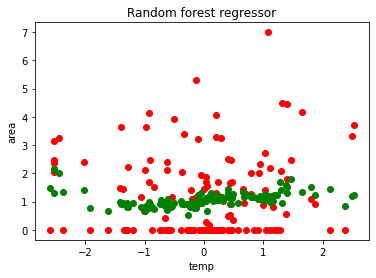

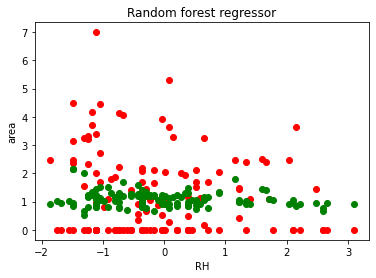

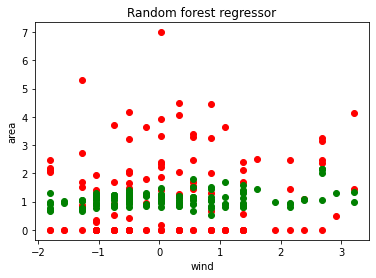

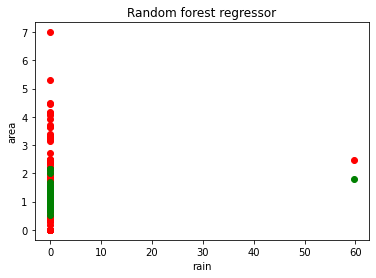

In [ ]:
for i in ["temp","RH","wind","rain"]:
  plt.scatter(t_fs3[i], y_test, color = 'red')
  plt.scatter(t_fs3[i], fs3_pred, color = 'green')

  plt.title("Random forest regressor")
  plt.xlabel(i)
  plt.ylabel('area')
  plt.show()



In [ ]:
model1.fit(fs3,y_train)
y_pred = model1.predict(t_fs3)
r2_score(y_test,y_pred)

0.024838096345881522

### CONCLUSION
- Random forest regressor gave the least error for the 3rd feature selection setup i.e. only meteorologial variables as features and MSE as evaluation metric
- After hyperparameter tuning, the error was reduced from 2.23 to 1.96.
- as seen in the scatter plot, the model generalizes well on the values that are non-zero
- thus, by discarding data points that indicates no area is burnt, results can be improved

In [ ]:
model2 = RandomForestRegressor(bootstrap="True",criterion= 'mse',
 max_depth= 4,
 max_features= 'log2',
 min_samples_split=2,
 
 n_estimators= 100,random_state = 25)
model2.fit(fs3,y_train)
y_pred = model2.predict(t_fs3)
mean_squared_error(y_test,y_pred)

1.9731140022611708

In [ ]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [ ]:
a=GSCV.predict(t_fs4)


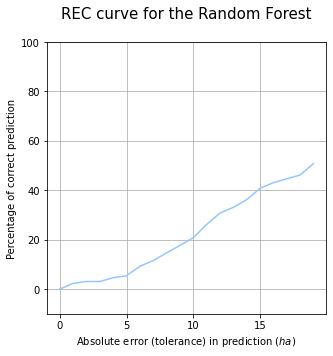

In [ ]:
rec_RF=[]
tol_max=20
for i in range(tol_max):$
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_RF)

## MODEL 2: SVM REGRESSOR

In [ ]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'rbf')
regressor2.fit(fs4, y_train)
fs4_p = regressor2.predict(t_fs4)
print("MSE: ",mean_squared_error(y_test,fs4_p))
print("r2: ",r2_score(y_test,fs4_p))

MSE:  2.4619247468955194
r2:  -0.2167443037171457


In [ ]:
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','poly']}

In [ ]:
grid_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=10)
grid_SVR.fit(fs4,y_train)
grid_SVR.best_params_

{'C': 0.01, 'epsilon': 1, 'kernel': 'rbf'}

In [ ]:
a=grid_SVR.predict(t_fs4)


In [ ]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

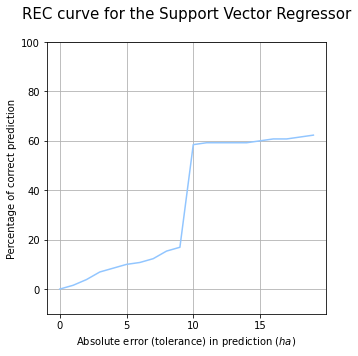

In [ ]:
rec_SVR=[]
tol_max=20
for i in range(tol_max):
    rec_SVR.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Support Vector Regressor\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)

In [ ]:
model_2 = SVR(C=0.01,epsilon=1,kernel='rbf')
model_2.fit(fs4, y_train)
fs4_p = model_2.predict(t_fs4)
print("MSE: ",mean_squared_error(y_test,fs4_p))

MSE:  2.074680423078821


In [ ]:
model_2 = SVR(C=0.01,epsilon=1,kernel='rbf',gamma="scale")
model_2.fit(fs3, y_train)
fs3_p = model_2.predict(t_fs3)
print("MSE: ",mean_squared_error(y_test,fs3_p))

MSE:  2.0750537189346834


In [ ]:
model_2 = SVR(C=0.01,epsilon=1,kernel='rbf')
model_2.fit(fs1, y_train)
fs1_p = model_2.predict(t_fs1)
print("MSE: ",mean_squared_error(y_test,fs1_p))

MSE:  2.0745379533562027


In [ ]:
model_2 = SVR(C=0.01,epsilon=1,kernel='rbf')
model_2.fit(fs2, y_train)
fs2_p = model_2.predict(t_fs2)
print("MSE: ",mean_squared_error(y_test,fs2_p))

MSE:  2.076112404218066


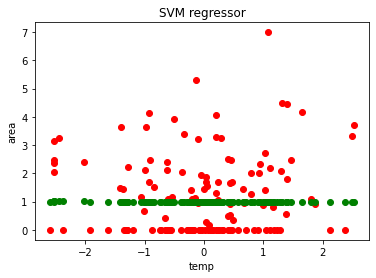

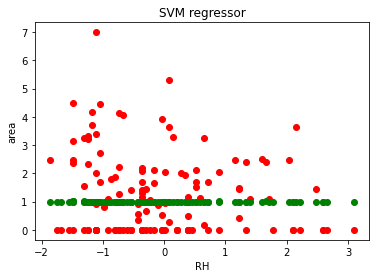

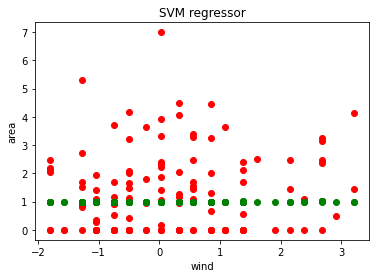

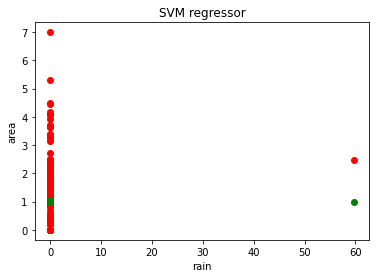

In [ ]:
for i in ["temp","RH","wind","rain"]:
  plt.scatter(t_fs3[i], y_test, color = 'red')
  plt.scatter(t_fs3[i], fs3_p, color = 'green')

  plt.title("SVM regressor")
  plt.xlabel(i)
  plt.ylabel('area')
  plt.show()